# OLG model 

Imports and set magics:

In [8]:
# a. set magic 
%load_ext autoreload
%autoreload 2
%matplotlib widget
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# b. package and settings for plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# c. local modules 
from modelproject import OLGclass, plot_K, plot_C, plot_pi, utility_table, plot_T_B

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

The overlapping generations (OLG) approach is a life-cycle model investigating the interactions between young and old individuals and the effect on multiple economic factors, i.e., for households one can look at saving and consumption behavoir, or for firms one can look at profits, and further the behavior of the government and the effects thereof can be examined, as well.


## Model description

We are very inspired by the OLG from the lectures. Thus we carry the same model forward with some expandsions. This have the followings description.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$. We look at 20 time periods.

**Demographics:** A life consists of two periods, *young* and *old*.

**Households:** 
Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$

The above utility is a Constant Relative Risk Aversion (CRRA) utility function where $\sigma$ measures the degree of relative risk aversion. 

If $\sigma = 1$ then the utility is logistic 

$$ U = log(C_{1t}) + \beta log(C_{2t+1}) $$

Further, the other parameters are:
- $s_t$: savings rate $\in[0,1]$
- $\tau_{w}$: labor income tax $\in [0,1]$
- $w_t$: labor wages 
- $N_t$: total number of people 
- $\tau_{r}$: capital income tax $\in [0,1]$
- $r_{t+1}$: rate next period 
- $S_t$: aggregated savings 

**Firms:** Firms have a Cobb-Douglas production function. 
    
$$
\begin{aligned}
Y_{t} = F(K_{t-1},L_{t})= K_{t-1}^{\alpha} L_{t}^{1-\alpha},\,\,\, \alpha \in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^K K_{t-1}
\end{aligned}
$$

Where $r_{t}^K$ is the rate on capital.

**Government:** Public consumption is $G_{t}$ and total tax revenue is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}N_{t}
\end{aligned}
$$
    
Government debt accumulates according to
$$\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}$$
Where $r^b_{t}$ is rate on bonds. 
       
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital: $r_{t}=r_{t}^{K}-\delta=r_{t}^{b}$
4. Labor market clears: $L_{t}=N_{t}=1$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

### Solution and simulation

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{K} & =\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =(1-\alpha)L_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.<br>

*Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{L}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1})+\tau_{w}w_{t}\\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

We want to expand with: 
- Population growth  
- Technology growth
- Implement pay as you go (PAYG) scheme
- Look into firm profits, tax revenue and government debt 

## Numerical solution

We start by running the code as in the lecture to make sure it runs. 

In order to implement the most simple model, the initial model take the values: $\theta = 0$ which make the production function Cobb-Douglas, $\sigma = 1$ thus the utility is logarithmic, and $\tau_w = 0$ and $\tau_r = 0$ such the government is passive. 

These values of the parameters are set in the py-file. 

We cant to compare the initial simulation to the analytical steady state. This is given by: 

$$ \lim_{t\rightarrow\infty} K_t = \left(\frac{1-\alpha}{1+1/\beta}\right)^{\frac{1}{1-\alpha}} $$

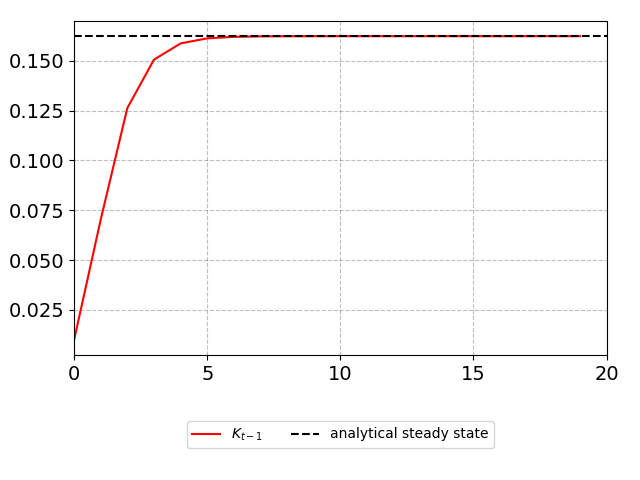

In [9]:
# a. call the class and set par and sim 
model = OLGclass()
par = model.par 
sim = model.sim 

# b. government
sim.balanced_budget[:] = True

# c. simulate model 
model.sim_model()

# d. analytical steady state 
K_analytical = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))

# e. plot the model with 'plot_K' function
plot_K(model.sim.K_lag, K_ss = K_analytical)

# f. save initial K_lag due to comparison 
K_lag_int = model.sim.K_lag.copy()

This is identical to the one from the lectures, hence the code is running in the right way. 

We try another starting value for capital stock, e.g. 1, which is the inital value in the OLGModelClass. 

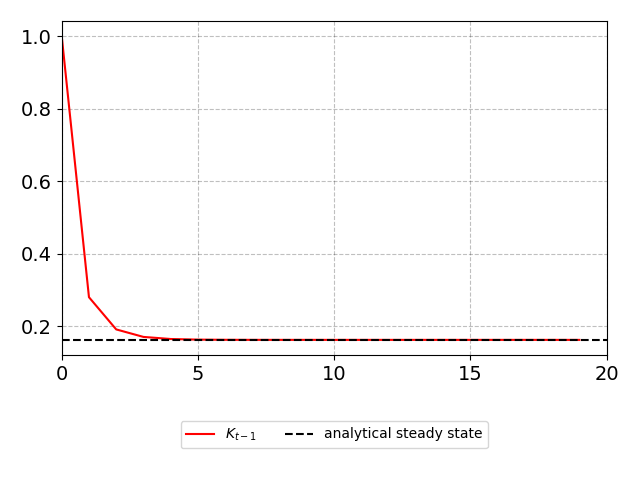

In [10]:
# a. call the class and set par and sim 
model12 = OLGclass()
par = model12.par 
sim = model12.sim 

# b. set starting value for K
par.K_lag_start = 1.0

# c. government
sim.balanced_budget[:] = True

# d. simulate model 
model12.sim_model()

# e. plot the model with 'plot_K' function
plot_K(model12.sim.K_lag, K_ss = K_analytical)

It is seen that the initial capital stock is essential to how $K_{t-1}$ converges.  

### Population growth 

We add population growth, such $N_t = 1 + n$, where labor maket still clears such $L_t = N_t = 1 + n$. 

All other parameters are as initially. 

Futher, we set the starting value of $K_{t-1} = 0.01$ in order to be able the compare with the initial plot. 

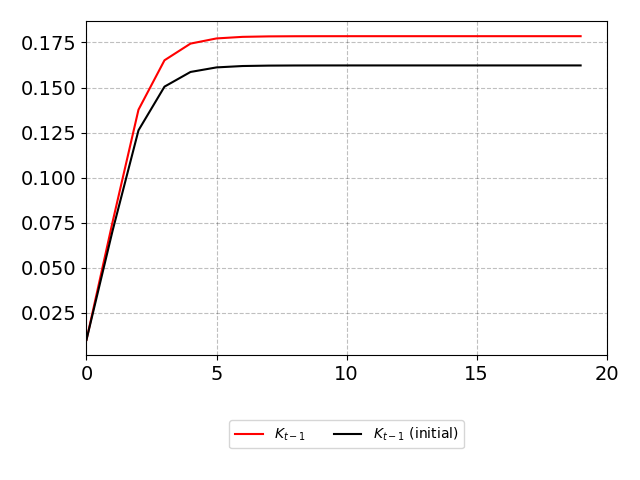

In [11]:
# a. call the class and set par and sim 
model1 = OLGclass()
par = model1.par
sim = model1.sim 

# b. government
sim.balanced_budget[:] = True 

# c. population growth
par.n = 1.1

# d. simulate model 
model1.sim_model()

# e. plot using function 
plot_K(K_lag = model1.sim.K_lag, K_lag_int = K_lag_int)

# f. save K_lag for comparison 
K_lag_pop = model1.sim.K_lag

We can see from the figure that as population increases thus the accumulated capital increases.

### Pupulation and Technological growth 

We further add technical growth, the production function is then the following: 

$$ Y_t = F(K_{t-1}, AL_t)$$

The following is a interactive plot such one can see how different values of population and technological growth/reduction effect capital. The values goes from 0.1 to 2. 

FloatSlider(value=1.0, description='n', max=2.0, min=0.1)

FloatSlider(value=1.0, description='At', max=2.0, min=0.1)

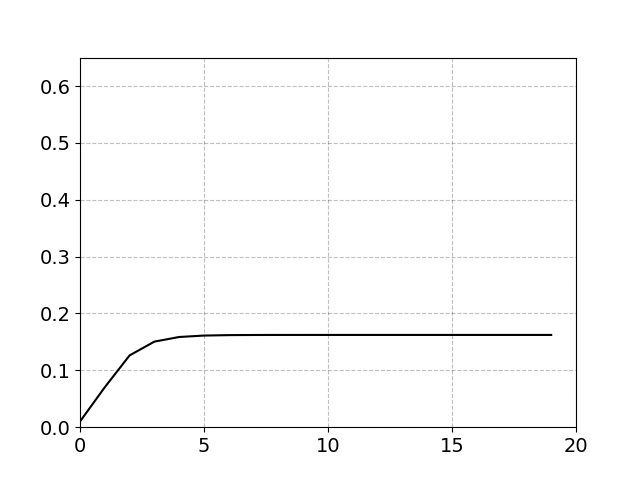

In [20]:
# a. call the class and set par and sim
model2 = OLGclass()
par = model2.par
sim = model2.sim

# b. government
sim.balanced_budget[:] = True

# c. population and technological growth
par.n = 1.1
par.At = 1.1

# c. create the figure and axis outside the update function
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# d. define an empty line for the plot
line, = ax.plot([], [], label=r'$K_{t-1}$', color='red')

# e. ereate sliders for interactive input
n_slider = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='n')
At_slider = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='At')

# f. add K_lag_int to the plot
ax.plot(K_lag_int, label=r'$K_{t-1}$ (initial)', color='black')
ax.set_xlim(0,20)
ax.set_ylim(0,0.65)
xticks = ax.get_xticks()
ax.set_xticks(xticks[::2])

# g. define a function that updates the values and simulates the model
def update_values(change):
    # i. set par and simulate the model 
    par.n = n_slider.value
    par.At = At_slider.value
    model2.sim_model()

    # ii. update the plot data
    line.set_data(range(len(model2.sim.K_lag)), model2.sim.K_lag)

    # iii. set the plot limits
    ax.set_xlim(0,20)
    ax.set_ylim(0,0.65)

    # iv. redraw the plot
    fig.canvas.draw()

# h. register the update function to be called when the slider values change
n_slider.observe(update_values, 'value')
At_slider.observe(update_values, 'value')

# i. add legend
#ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), fontsize=10, ncol=2)

# j. display the sliders
display(n_slider)
display(At_slider)

It is seen that as population and techology increases thus the accumulated capital further increases. The oppisite is present if the population and techology decreases. 

We can further look at the effect on firm profits when the population and the techology growth of 10% each. 

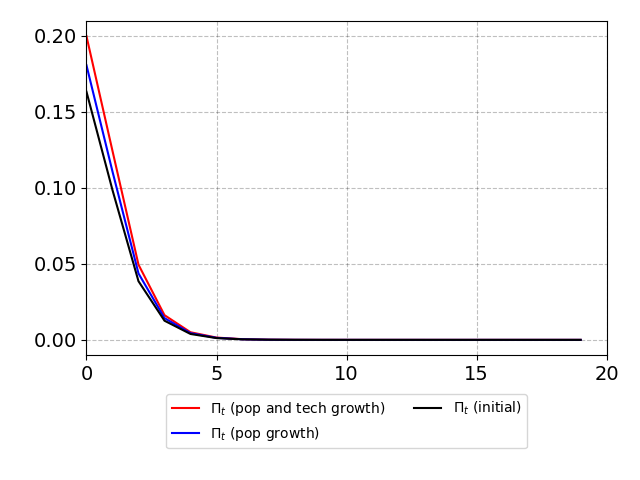

In [22]:
# a. call the class and set par and sim
model21 = OLGclass()
par = model21.par
sim = model21.sim

# b. government
sim.balanced_budget[:] = True

# c. population and technological growth
par.n = 1.1
par.At = 1.1

# d. 
model21.sim_model()

# e. 
plot_pi(pi_n_At = model21.sim.pi, pi_n = model1.sim.pi, pi_int = model.sim.pi)

If we look at the plot, it is seen that the highest profit is for population and technological growth og 10%, and lowset profit is for the initial simulation. 

All decrease to the same steady state of 0 over time.

### PAYG scheme

We implement PAYG upon the model where young pay d to the old at time 0 and old recieve at time 1. Thus, the consumptions for young and old at time 0 become: 

$$ 
\begin{aligned}
& C_{1,0} = (1-s_{0})(1-\tau_{w})w_{0}N_{0} - d\\ 
& C_{2,1} = (1+(1-\tau_{r})r_{1})S_{1} + d
\end{aligned}
$$

As initially, the labour, $L_t$, and pupulation, $N_t$, are normalized to 1. 


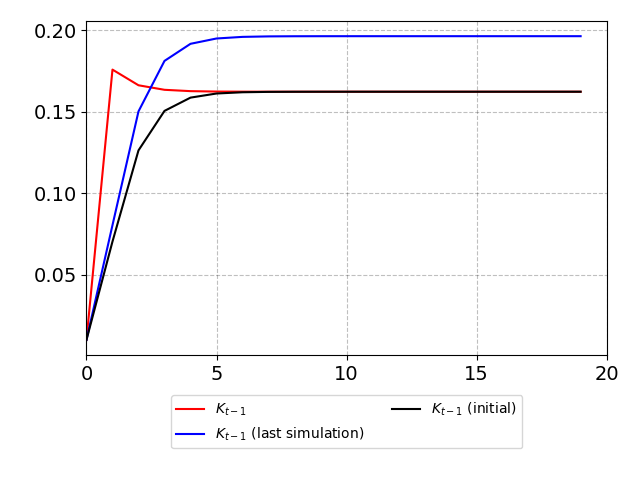

In [ ]:
# a. call the class and set par and sim 
model3 = OLGclass()
par = model3.par 
sim = model3.sim 

# b. government
sim.balanced_budget[:] = True 

# c. PAYG 
par.d = 0.01

# d. simulate model 
model3.sim_model()

# e. plot function 
plot_K(K_lag = model3.sim.K_lag, K_lag_int = K_lag_int, K_lag_old = K_lag_tech)


As seen from the figure, the implementing of the PAYG for one period increases the kapital for the first period, but afterwards it decreases and reaches its initial steady state after around 6 periods. 

We further try to look at the consumption of young and old before and after the PAYG. 

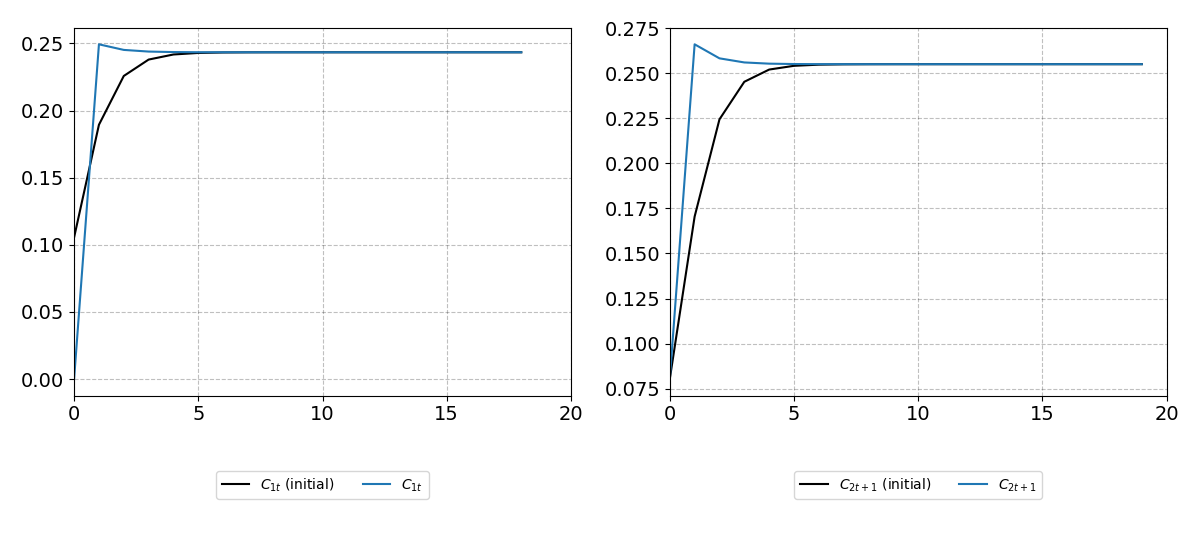

In [ ]:
# a. plot consumption for old and young in PAYG compared to initial model
plot_C(C1 = model.sim.C1, C1_2 = model3.sim.C1, C2_1 = model.sim.C2, C2_1_2 = model3.sim.C2)

From the above plots, it is seen that in the initial case the consumption starts at around 0.1 and increases to steady state around barely 0.25 after 6 periods. After implementing PAYG the consumption of young starts at around 0, but this increases to 0.25 in period 1 and then the consumption decreases towards steady state. 

The same delelopment is present for the comsumption of old, but the consumption of old is not affected in period 0. The consumption just increases to around 0.266 in period 1 and then afterward decreases to the steday state. 

### Active government

We can then add an active government, so we implement a labor income tax, $\tau_w$, of 1%. 

In [ ]:
# a. call the class and set par and sim 
model4 = OLGclass()
par = model4.par 
sim = model4.sim 

# b. government
par.tau_w = 0.01
sim.balanced_budget[:] = True

# c. simulate model 
model4.sim_model()

# d. save K_lag for comparison 
K_lag_tau_w = model4.sim.K_lag

We implement a capital income tax, $\tau_r$, of 1% for comparison to  $\tau_w$, of 1% 

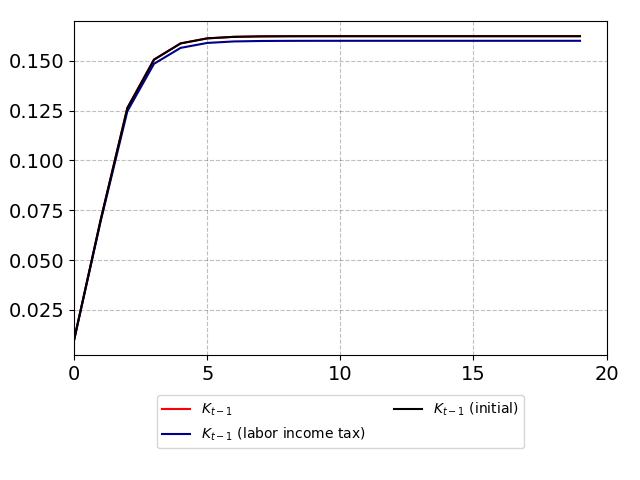

In [ ]:
# a. call the class and set par and sim 
model5 = OLGclass()
par = model5.par 
sim = model5.sim 

# b. government
par.tau_r = 0.01
sim.balanced_budget[:] = True

# c. simulate model 
model5.sim_model()

# d. plot function for K_lag_tau_r and K_lag_tau_w
plot_K(K_lag = model5.sim.K_lag, K_lag_int =  K_lag_int, K_lag_tau = K_lag_tau_w)

From the above we see that the capital income tax does not have much effect on the accumulated capital, while the labor income tax has a small negative effect on $K_{t-1}$.

We can try to look at how the different taxes effect consumption.

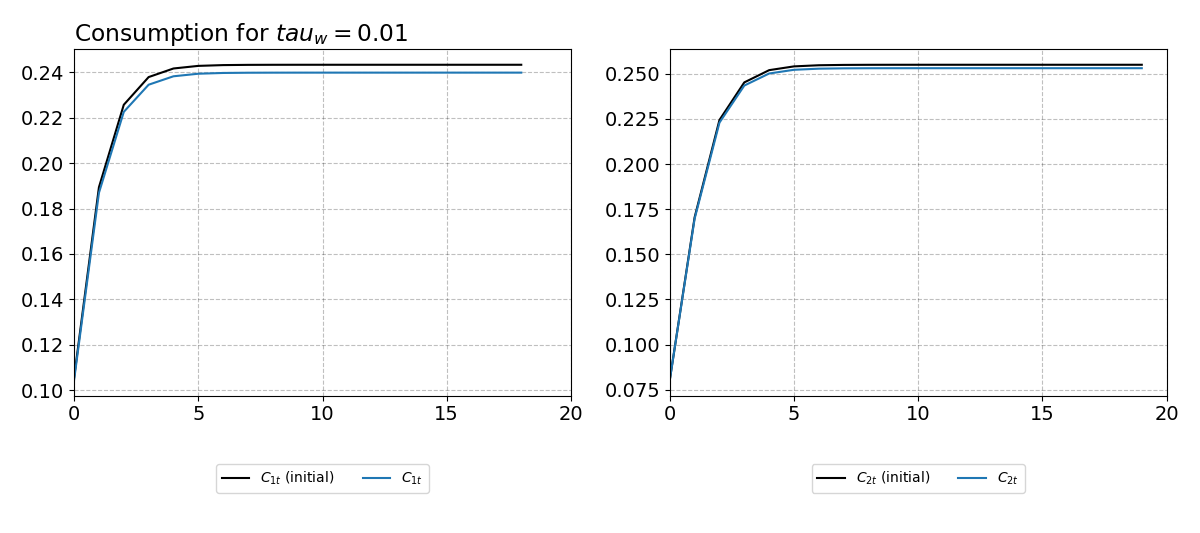

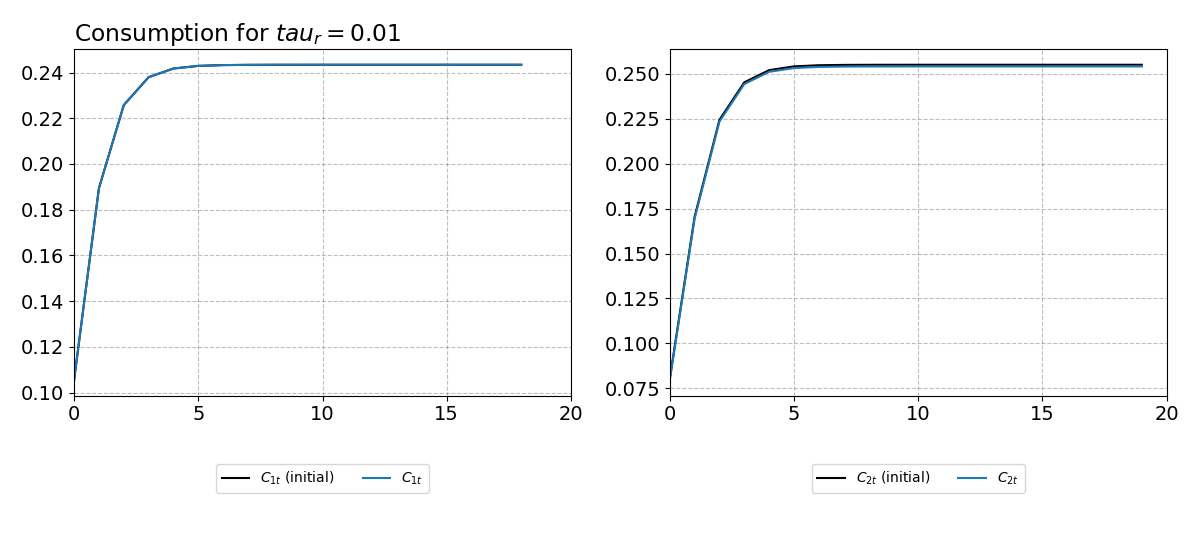

In [ ]:
# a. plot consumption for old and young in with tau_w compared to initial model
plot_C(model.sim.C1, model4.sim.C1, model.sim.C2, model4.sim.C2, title = 'Consumption for $tau_w = 0.01$')

# b. plot consumption for old and young in with tau_r compared to initial model
plot_C(model.sim.C1, model5.sim.C1, model.sim.C2, model5.sim.C2, title = 'Consumption for $tau_r = 0.01$')

We see that when the government implements a labor income tax it effects the consumption of the young more negative than the old. 

Looking at the effect of a capital income tax on the consumption we see that it has no effect on the young, but a very small negative effect on the old. 

#### Goverment tax revenue and debt

We can look a how thw goverment debt and tax revenue looks initially, after implementing labor income tax and after implementing capital income tax. 

This is shown in the following plot.

In [ ]:
# a. plot tax revenue and government debt
plot_T_B(model.sim.T, model4.sim.T, model5.sim.T, model.sim.B, model4.sim.B, model5.sim.B)

NameError: name 'model4' is not defined

From the above figure on tax renevue, we see that the highest is when implementing a labor income tax. And given that the government is not active in the initial model, the tax revenue is 0. 

If we look at debt, it is seen that it is always 0. This is due to the balanced budget. 

## Conclusion

To conclude from the above implementation of the OLG model, we see that inital capital stock effects the convergence of the captial stock over time. 

Further, we see that population and technology growth has a positive effect on both capital and profits. Profits return to steady state of 0 either way. 

When implementing the PAYG scheme, we see that it has a great effect on the steady state for capital, and cause the consumption of the young to be almost 0, while the consumption of old increases. 

The results of the active government show that labor income tax has a greater effect on capital as well as the comsumption for both young and old than capital income tax. This effect is the same for tax revenues. Debt are not affected. 